In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def lorenz63_fdm(x0, ts, sigma=10, r=28, b=8/3):
    """Solve lorenz63 with finit difference method"""    
    size = ts.size
    dt = ts[1] - ts[0]
    
    x = np.zeros((size,))
    y = np.zeros((size,))
    z = np.zeros((size,))
    x[0] = x0[0]
    y[0] = x0[1]
    z[0] = x0[2]
    
    for i in range(1, size):
        x[i] = x[i-1] + sigma * (y[i-1] - x[i-1]) * dt
        y[i] = y[i-1] + (r*x[i-1] - y[i-1] - x[i-1]*z[i-1]) * dt
        z[i] = z[i-1] + (x[i-1]*y[i-1] - b*z[i-1]) * dt
    
    return np.vstack((x, y, z))

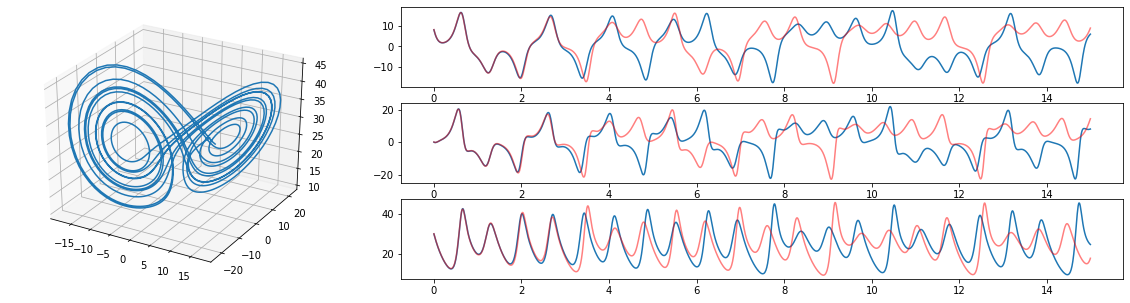

In [5]:
time = 15
dt = 0.01
ts = np.arange(0, time, dt)
X0 = np.array([[8, 0, 30]]).T
X_nature = lorenz63_fdm(X0.ravel(), ts)

X0_per = X0 + 0.1
X_per = lorenz63_fdm(X0_per.ravel(), ts)

# plot nature run
fig = plt.figure(figsize=(20,5))
gs = fig.add_gridspec(nrows=3, ncols=3)

ax_line1 = fig.add_subplot(gs[0,1:])
ax_line2 = fig.add_subplot(gs[1,1:])
ax_line3 = fig.add_subplot(gs[2,1:])
ax_3d = fig.add_subplot(gs[:,0], projection='3d')

ax_line1.plot(ts, X_nature[0,:])
ax_line1.plot(ts, X_per[0,:], color='red', alpha=0.5)
ax_line2.plot(ts, X_nature[1,:])
ax_line2.plot(ts, X_per[1,:], color='red', alpha=0.5)
ax_line3.plot(ts, X_nature[2,:])
ax_line3.plot(ts, X_per[2,:], color='red', alpha=0.5)
ax_3d.plot(X_nature[0,:], X_nature[1,:], X_nature[2,:]);

In [93]:
def stability_index_lorenz63(x, y, z, sigma=None, r=None, b=None):
    if sigma is None:
        sigma = 10
    if r is None:
        r = 28
    if b is None:
        b = 8/3
        
    M = np.array([
        [-sigma, sigma, 0],
        [r-z, -1, -x],
        [y, x, -b]
    ])
    
    eigv, P = np.linalg.eig(M)
    r = eigv.real
    if np.all(r<0):
        # stable case
        return r.sum()
    else:
        # unstable case
        r[r<0] = 0
        return r.sum()

In [94]:
stableidx = []
for x in X_nature.T:
    stableidx.append(stability_index_lorenz63(*x))

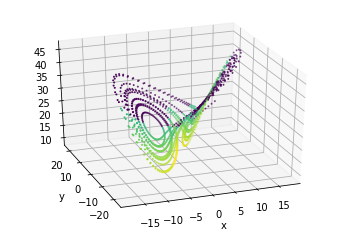

In [95]:
fig = plt.figure()
ax_3d = fig.gca(projection='3d')
#ax_3d.plot(X_nature[0,:], X_nature[1,:], X_nature[2,:])
ax_3d.scatter3D(X_nature[0,:], X_nature[1,:], X_nature[2,:], c=stableidx, s=1)
ax_3d.set_xlabel('x')
ax_3d.set_ylabel('y')
ax_3d.view_init(30, 250)

In [69]:
for i in range(len(stableidx)):
    print(f'{i: 4d}  index:{stableidx[i]:.4f}  coordinate:{X_nature[:,i]}')

   0  index:0.0000  coordinate:[ 8.  0. 30.]
   1  index:0.0000  coordinate:[ 7.2  -0.16 29.2 ]
   2  index:0.0000  coordinate:[ 6.464      -0.2448     28.40981333]
   3  index:0.0000  coordinate:[ 5.79312    -0.26884233 27.63639444]
   4  index:0.0000  coordinate:[ 5.18692377 -0.2450898  26.88384956]
   5  index:0.0000  coordinate:[ 4.64372241 -0.18474503 26.15423429]
   6  index:0.0000  coordinate:[ 4.16087567 -0.09718535 25.44820899]
   7  index:0.0000  coordinate:[3.73506956e+00 9.96335737e-03 2.47655463e+01]
   8  index:0.0000  coordinate:[ 3.36255894  0.13067282 24.10550389]
   9  index:0.0000  coordinate:[ 3.03937033  0.26032082 23.46708441]
  10  index:1.4087  coordinate:[ 2.76146538  0.3954897  22.8492076 ]
  11  index:2.1767  coordinate:[ 2.52486781  0.53377215 22.25081671]
  12  index:2.7400  coordinate:[ 2.32575825  0.67359371 21.67093864]
  13  index:3.1982  coordinate:[ 2.16054179  0.81405644 21.1087131 ]
  14  index:3.5889  coordinate:[ 2.02589326  0.95480501 20.56340212